In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/')

In [3]:
trace_a = pickle.load(open('earm_dreamzs_5chain_a_psostart.p'))
trace_b = pickle.load(open('earm_dreamzs_5chain_b_psostart.p'))
trace_c = pickle.load(open('earm_dreamzs_5chain_c_psostart.p'))
trace_d = pickle.load(open('earm_dreamzs_5chain_d_psostart.p'))

In [4]:
trace_a_error = {}
trace_b_error = {}
trace_c_error = {}
trace_d_error = {}
for key in ['momp', 'icrp', 'ecrp']:
    trace_a_error[key] = trace_a[key]
    trace_b_error[key] = trace_b[key]
    trace_c_error[key] = trace_c[key]
    trace_d_error[key] = trace_d[key]

In [5]:
for key in ['momp', 'icrp', 'ecrp']:
    del trace_a[key]
    del trace_b[key]
    del trace_c[key]
    del trace_d[key]

In [6]:
param_trace_a = convert_param_vec_dict_to_param_dict(trace_a, model.parameters_rules())
param_trace_b = convert_param_vec_dict_to_param_dict(trace_b, model.parameters_rules())
param_trace_c = convert_param_vec_dict_to_param_dict(trace_c, model.parameters_rules())
param_trace_d = convert_param_vec_dict_to_param_dict(trace_d, model.parameters_rules())

In [7]:
os.chdir('/home/shockle/moo_and_mcmc/emcee/')

In [8]:
from earm_uniform_emcee import log_post

In [9]:
for trace in [trace_a, trace_b, trace_c, trace_d]:
    for chain in range(len(trace_a['params'])):
        log_post(trace['params'][chain][-1])

prior:  -282.479411206  like:  -966.951503914  post:  -1249.43091512
prior:  -282.479411206  like:  -963.717364579  post:  -1246.19677578
prior:  -282.479411206  like:  -964.885685908  post:  -1247.36509711
prior:  -282.479411206  like:  -967.264071888  post:  -1249.74348309
prior:  -282.479411206  like:  -965.69615707  post:  -1248.17556828
prior:  -282.479411206  like:  -772.347586151  post:  -1054.82699736
prior:  -282.479411206  like:  -785.302683228  post:  -1067.78209443
prior:  -282.479411206  like:  -774.960978501  post:  -1057.44038971
prior:  -282.479411206  like:  -779.96833135  post:  -1062.44774256
prior:  -282.479411206  like:  -779.246201293  post:  -1061.7256125
prior:  -282.479411206  like:  -937.676890433  post:  -1220.15630164
prior:  -282.479411206  like:  -938.86175513  post:  -1221.34116634
prior:  -282.479411206  like:  -931.627671624  post:  -1214.10708283
prior:  -282.479411206  like:  -942.163737257  post:  -1224.64314846
prior:  -282.479411206  like:  -924.64

In [10]:
print_convergence_summary(param_trace_a)

Number of parameters with GR below 1.2:  104  of  105  parameters.
Percent of parameters with GR below 1.2:  99.0476190476
Number of parameters with GR below 1.1:  103  of  105  parameters.
Percent of parameters with GR below 1.1:  98.0952380952


[104, 99.04761904761905, 103, 98.09523809523809]

In [11]:
print_convergence_summary(param_trace_b)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  105  of  105  parameters.
Percent of parameters with GR below 1.1:  100.0


[105, 100.0, 105, 100.0]

In [12]:
print_convergence_summary(param_trace_c)

Number of parameters with GR below 1.2:  100  of  105  parameters.
Percent of parameters with GR below 1.2:  95.2380952381
Number of parameters with GR below 1.1:  75  of  105  parameters.
Percent of parameters with GR below 1.1:  71.4285714286


[100, 95.23809523809523, 75, 71.42857142857143]

In [13]:
print_convergence_summary(param_trace_d)

Number of parameters with GR below 1.2:  100  of  105  parameters.
Percent of parameters with GR below 1.2:  95.2380952381
Number of parameters with GR below 1.1:  91  of  105  parameters.
Percent of parameters with GR below 1.1:  86.6666666667


[100, 95.23809523809523, 91, 86.66666666666667]

60000
5
60000


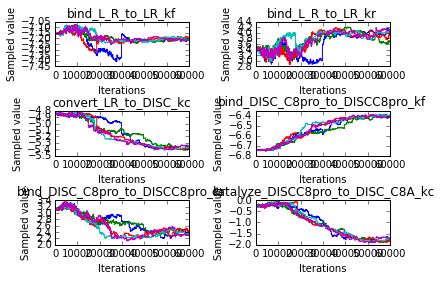

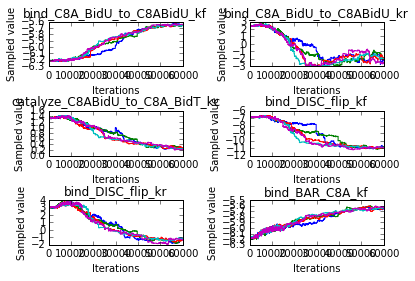

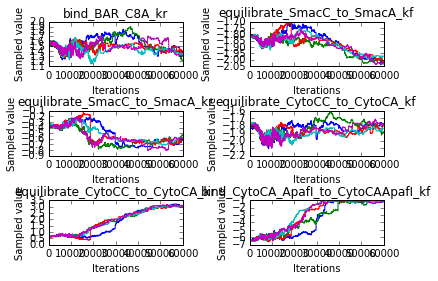

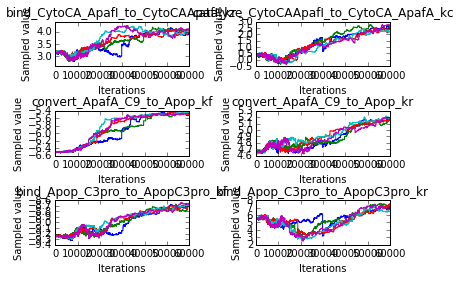

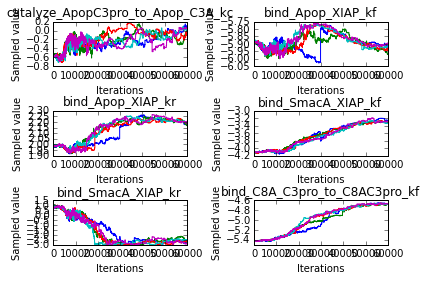

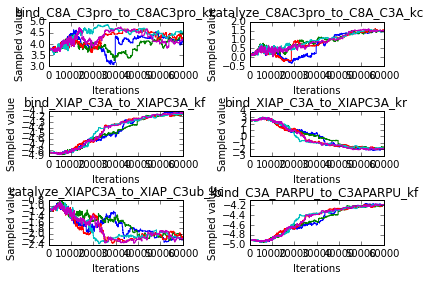

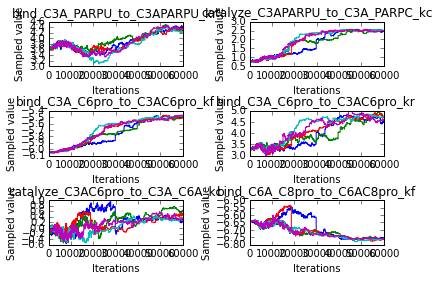

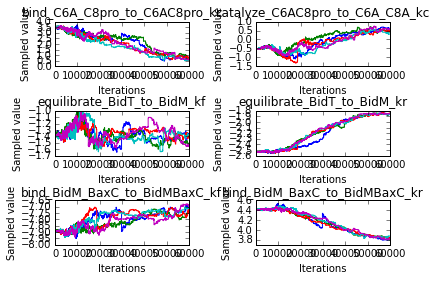

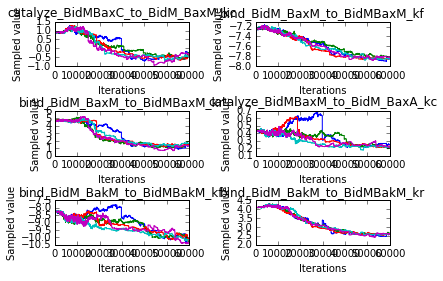

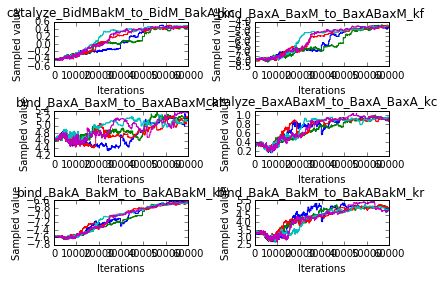

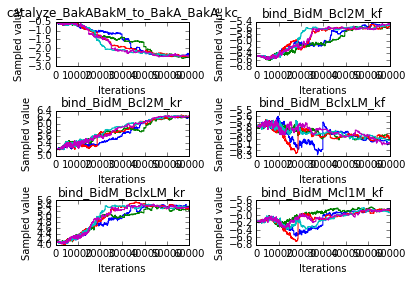

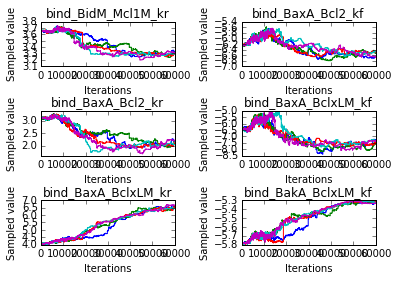

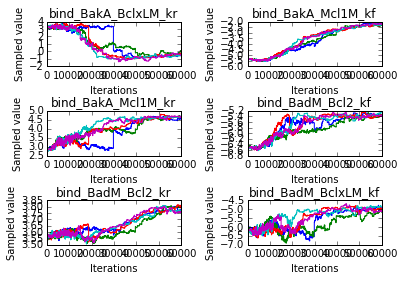

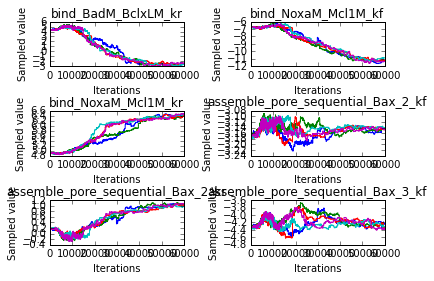

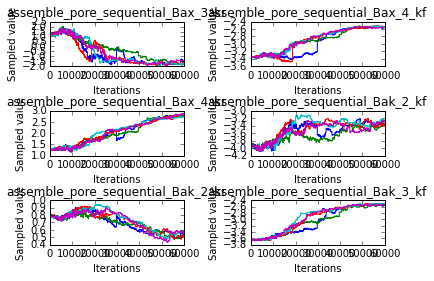

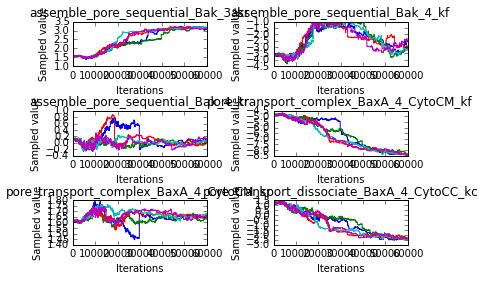

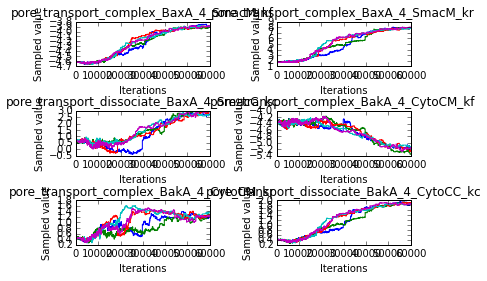

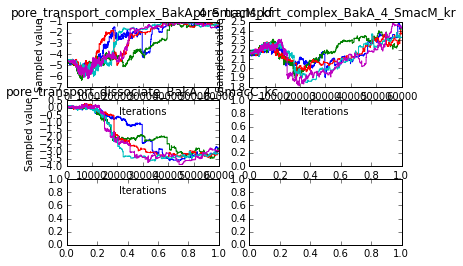

In [14]:
sample_plots(param_trace_a)

In [15]:
trace_arr_a = create_trace_matrix(param_trace_a, burnin=50000)
trace_arr_b = create_trace_matrix(param_trace_b, burnin=50000)
trace_arr_c = create_trace_matrix(param_trace_c, burnin=50000)
trace_arr_d = create_trace_matrix(param_trace_d, burnin=50000)

In [17]:
np.save('earm_dreamzs_5chain_psostart_a_tracearr.npy', trace_arr_a)
np.save('earm_dreamzs_5chain_psostart_b_tracearr.npy', trace_arr_b)
np.save('earm_dreamzs_5chain_psostart_c_tracearr.npy', trace_arr_c)
np.save('earm_dreamzs_5chain_psostart_d_tracearr.npy', trace_arr_d)

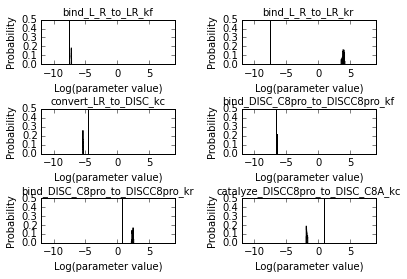

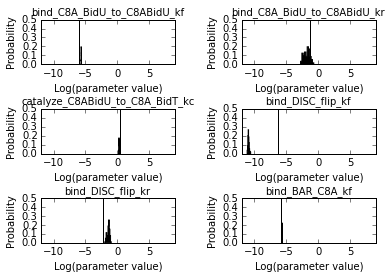

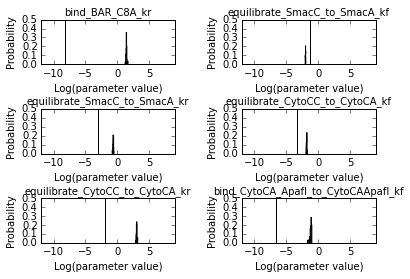

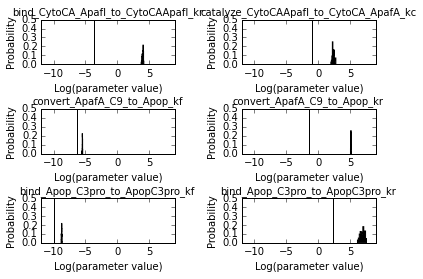

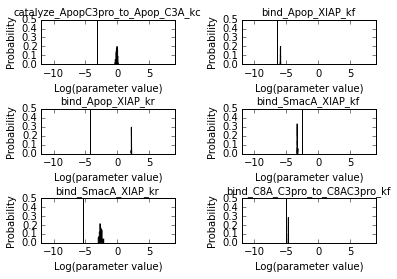

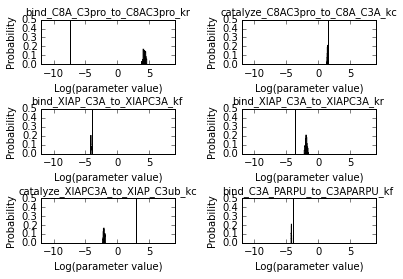

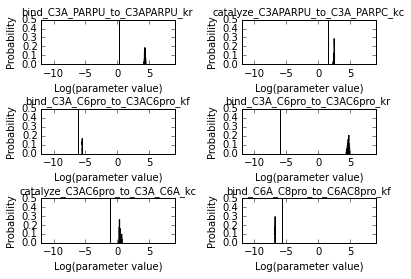

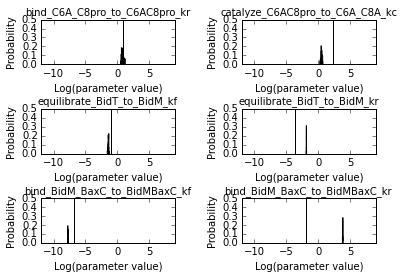

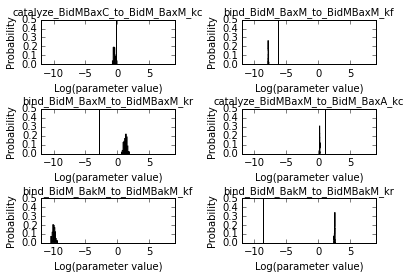

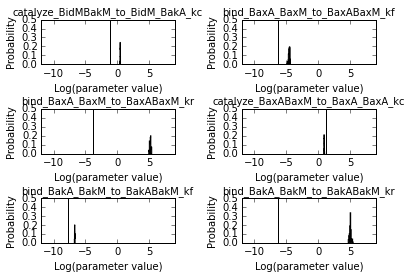

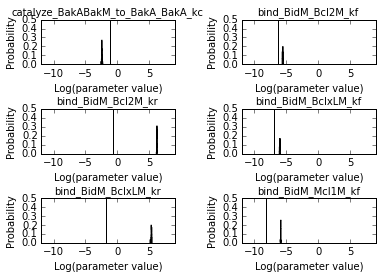

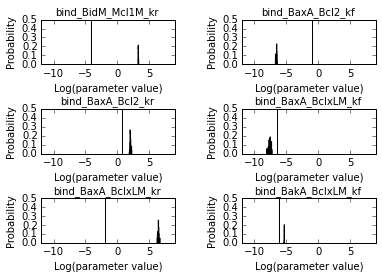

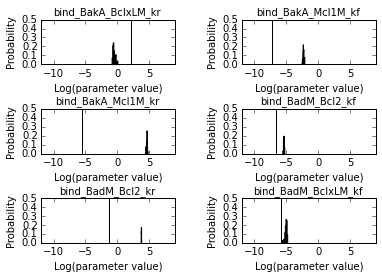

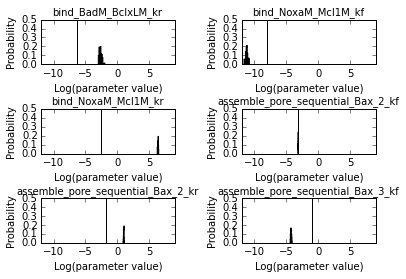

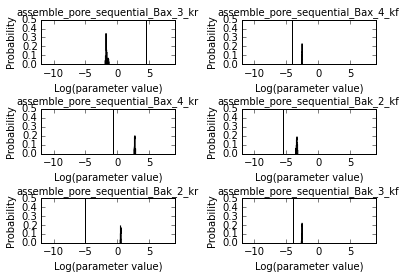

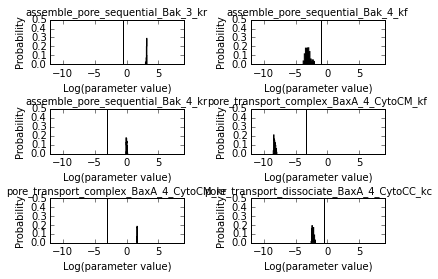

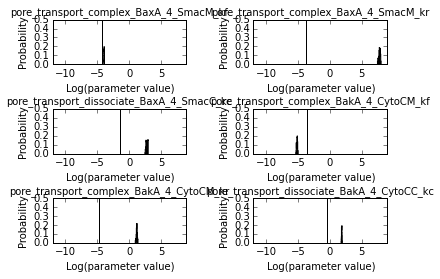

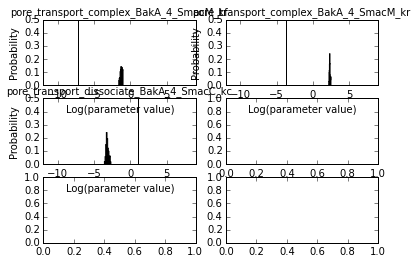

In [16]:
plot_histograms(param_trace_a, trace_arr_a, plot_original_vals=True, model=model, title_fontsize=10)